# Final Tutorial

In [1]:
import sqlite3
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, datasets
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

## Collecting & Tidying the Data

The datasets we are going to analyze is from the website:https://opendata.maryland.gov/Public-Safety/Violent-Crime-Property-Crime-by-County-1975-to-Pre/jwfa-fdxs The dataset comes in the form of a CSV (Comma Separated Value) file. So the pandas.read_csv function is used here to read the data and put all the data into a Panda Dataframe for us.

In [2]:
data = pd.read_csv("data.csv")
data.head()

,JURISDICTION,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,...,"B & E PER 100,000 PEOPLE","LARCENY THEFT PER 100,000 PEOPLE","M/V THEFT PER 100,000 PEOPLE","MURDER RATE PERCENT CHANGE PER 100,000 PEOPLE","RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE","ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE","AGG. ASSAULT RATE PERCENT CHANGE PER 100,000 PEOPLE","B & E RATE PERCENT CHANGE PER 100,000 PEOPLE","LARCENY THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE","M/V THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE"
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,839.9,1789.0,116.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,692.3,1649.1,87.0,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,721.1,1693.0,124.2,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,674.0,1738.2,125.1,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,629.7,2020.8,124.2,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7


As shown in the dataframe above, there are some missing values for several columns. 

In order to have a better understanding of the missing values, all the rows containing the missing values are displayed as below so that we can choose the best way to handle them.

In [3]:
data.isnull().values.any()
is_NaN = data.isnull()
rows = is_NaN.any(axis=1)
df_r = data[rows]

In [4]:
data = data.fillna(0)

We observe missing values of the rate of change in the same year of 1975. Since 1975 is the starting year of our dataset, it makes sense that we cannot have any values of rate of change here.
So we decide to just set these values to zero.

In [5]:
data.columns = data.columns.str.replace(" ", "_")

# Explorative data analysis

# Hypothesis test & Machine Learning

## Linear Model

By observing the graph above and using intuition, we think there might be a linear relation between independent variable YEAR and the dependent variable GRAND_TOTAL. 

Therefore, we want to fit a linear regression model, and start a hypothesis test with null hypothesis of no relationship between YEAR and GRAND_TOTAL.

The linear regrssion model is created by the linear model from sklearn. For more information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

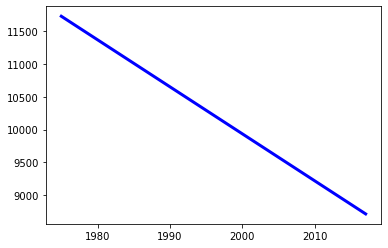

In [6]:
data = data.sort_values('YEAR')
reg = linear_model.LinearRegression()
new_year = np.array(data.YEAR)[:, np.newaxis]
reg.fit(new_year, data.GRAND_TOTAL)
crime_predicted = reg.predict(new_year)
data['crime_prediction']= crime_predicted 
plt.plot(new_year, crime_predicted, color='blue', linewidth=3)

In [7]:
print('Intercept:', reg.intercept_)
print('Coeff:', reg.coef_)
print('Score:',reg.score(new_year,data.GRAND_TOTAL))
print('Mean Absolute Error:', metrics.mean_absolute_error(data.GRAND_TOTAL, crime_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(data.GRAND_TOTAL, crime_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data.GRAND_TOTAL, crime_predicted)))
print('Pearson correlation coefficient & p-value:', stats.pearsonr(data.GRAND_TOTAL, crime_predicted))

Intercept: 153380.66954847478
Coeff: [-71.72319541]
Score: 0.0026826458299703537
Mean Absolute Error: 12066.864583333327
Mean Squared Error: 294516762.1370686
Root Mean Squared Error: 17161.490673512853
Pearson correlation coefficient & p-value: (0.05179426445051736, 0.09631685364534263)


It turns out that the null hypothesis would not be rejected. The P-value is 0.096 which is bigger than the siginificance level of 0.05. Therefore, we should accept the null hypothesis, meaning that there is no linear relationship between year and total crime number. The score, which is the value of R^2, here is only about 0.0026.

We do notice a huge Root Mean Squared Error between the predicted total crime and the real total crime. So we decide to compute the residual by subtracting the predicted total crime from the real total crime and make a violin plot to display the distribution of the residual and to get a better understanding of our prediction.

To create a violinplot we use the the seaborn.violinplot() function. For more information: https://seaborn.pydata.org/generated/seaborn.violinplot.html

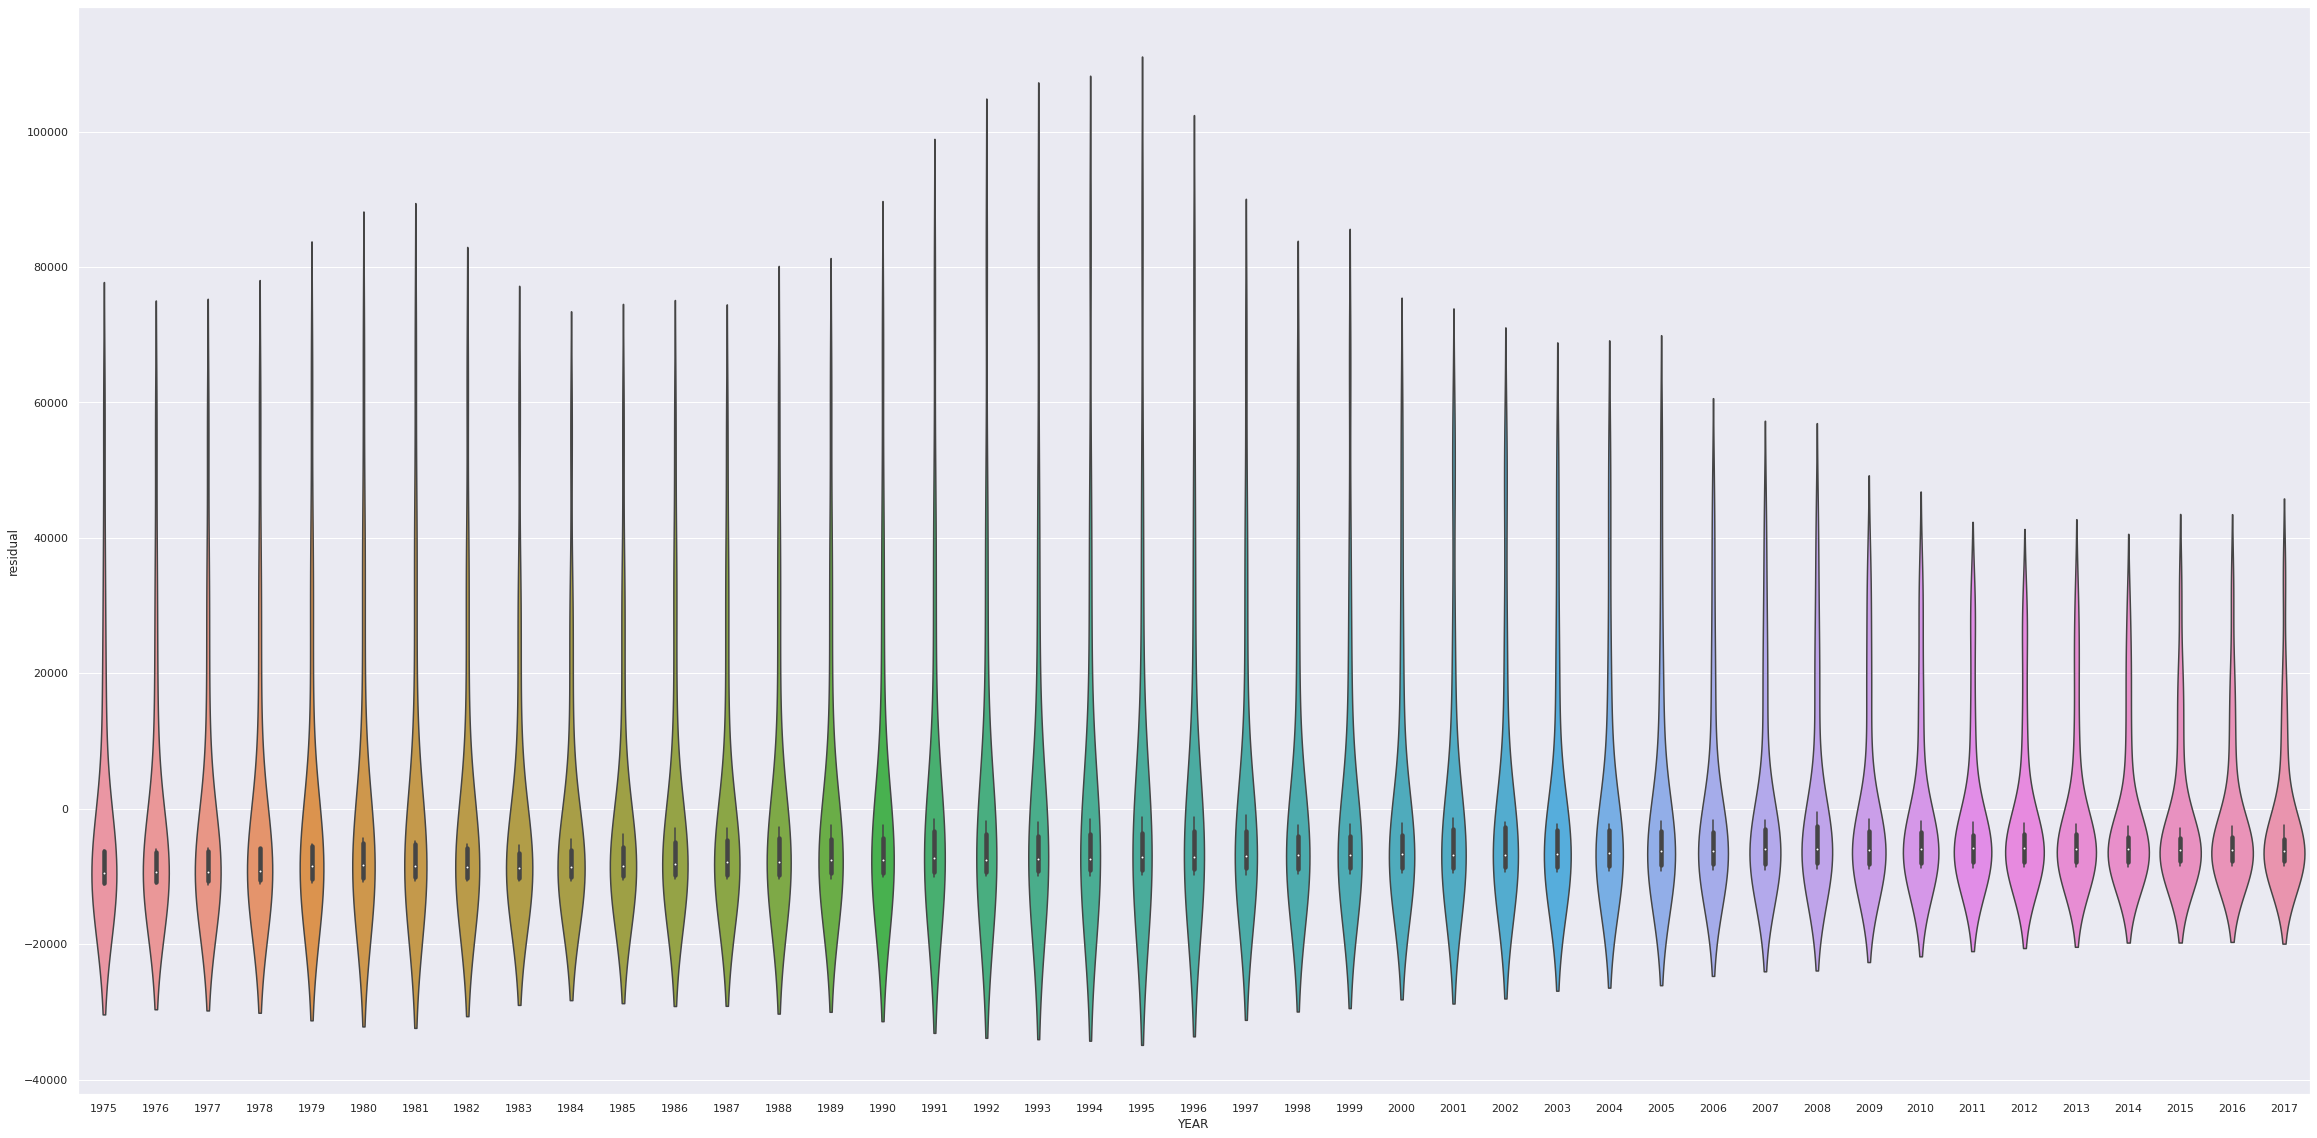

In [8]:
data['residual'] = data['GRAND_TOTAL'] - data['crime_prediction'] 
sns.set(rc={'figure.figsize':(40,20)})
ax = sns.violinplot(x="YEAR", y="residual", data = data)

From the graph above we can observe a really terrible prediction of the total crime. The range of the residual is extremely big every year, meaning that we are not considering the outliers. Also, the predicted crime seems to exceed the real number ever year

## Linear model with interaction terms
This violin plot would suggest a over generalization. Therefore, we decide to consider the difference between counties. We believe there is a dependence between residual and counties, since each county seems to has its own specific crime number.

A new linear regression model with interaction terms between year and county is implemented with the equation of:
###### Predicted_Total_Crime = constant + a1 * year + a2 * year * county1 + a3 * year * county2 +...+ aN * year * countyN
[a is the coefficient for each term]

In [9]:
Y = data.GRAND_TOTAL
X_inter = data[['YEAR','JURISDICTION']]
X_inter = pd.get_dummies(data=X_inter)##counties are transformed to binary
for i in X_inter.columns:
    if(i != 'YEAR'):
        X_inter['YEAR'+'*'+ i] = X_inter.YEAR * X_inter[i]
X_inter = sm.add_constant(X_inter)
inter_model = sm.OLS(Y, X_inter).fit()
data['interaction_prediction'] = inter_model.predict(X_inter).values

Here, we choose the model from the statsmodel package so that we can observe the regression results with more details in a table created. For more information using the model: https://www.statsmodels.org/stable/regression.html

In [10]:
inter_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            GRAND_TOTAL   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     474.3
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:02:32   Log-Likelihood:                -9895.8
No. Observations:                1032   AIC:                         1.989e+04
Df Residuals:                     984   BIC:                         2.012e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     1.472e+05   1.74e+04      8.466      0.000    1.13e+05    1.81e+05
YEAR                                       -68.8543      8.714     -7.902      0.000     -85.954     -51.755
JURISDICTION_Allegany County              -1.69e+05   8.69e+04     -1.945      0.052    -3.4e+05    1517.179
JURISDICTION_Anne Arundel County         -5.012e+04   8.69e+04     -0.577      0.564   -2.21e+05     1.2e+05
JURISDICTION_Baltimore City               1.961e+06   8.69e+04     22.567      0.000    1.79e+06    2.13e+06
JURISDICTION_Baltimore County              6.69e+05   8.69e+04      7.699      0.000    4.98e+05    8.39e+05
JURISDICTION_Calvert County              -1.959e+05   8.69e+04     -2.255      0.024   -3.66e+05   -2.54e+04
JURISDICTION_Caroline County             -1.727e+05   8.69e+04     -1.987      0.047   -3.43e+05   -2159.812
JURISDICTION_Carroll County              -1.708e+05   8.69e+04     -1.966      0.050   -3.41e+05    -330.172
JURISDICTION_Cecil County                -2.221e+05   8.69e+04     -2.556      0.011   -3.93e+05   -5.16e+04
JURISDICTION_Charles County              -2.172e+05   8.69e+04     -2.499      0.013   -3.88e+05   -4.66e+04
JURISDICTION_Dorchester County           -1.425e+05   8.69e+04     -1.640      0.101   -3.13e+05     2.8e+04
JURISDICTION_Frederick County            -1.755e+05   8.69e+04     -2.020      0.044   -3.46e+05   -4978.843
JURISDICTION_Garrett County              -1.449e+05   8.69e+04     -1.667      0.096   -3.15e+05    2.56e+04
JURISDICTION_Harford County              -9.848e+04   8.69e+04     -1.133      0.257   -2.69e+05     7.2e+04
JURISDICTION_Howard County               -1.827e+05   8.69e+04     -2.102      0.036   -3.53e+05   -1.22e+04
JURISDICTION_Kent County                 -1.383e+05   8.69e+04     -1.591      0.112   -3.09e+05    3.22e+04
JURISDICTION_Montgomery County            2.637e+05   8.69e+04      3.035      0.002    9.32e+04    4.34e+05
JURISDICTION_Prince George's County        4.35e+05   8.69e+04      5.006      0.000    2.64e+05    6.06e+05
JURISDICTION_Queen Anne's County         -1.588e+05   8.69e+04     -1.827      0.068   -3.29e+05    1.17e+04
JURISDICTION_Somerset County             -1.486e+05   8.69e+04     -1.711      0.087   -3.19e+05    2.19e+04
JURISDICTION_St. Mary's County           -1.812e+05   8.69e+04     -2.085      0.037   -3.52e+05   -1.07e+04
JURISDICTION_Talbot County               -1.415e+05   8.69e+04     -1.628      0.104   -3.12e+05     2.9e+04
JURISDICTION_Washington County           -1.536e+05   8.69e+04     -1.768      0.077   -3.24e+05    1.69e+04
JURISDICTION_Wicomico County             -2.053e+05   8.69e+04     -2.362      0.018   -3.76e+05   -3.48e+04
JURISDICTION_Worcester County  

Our R^2 is 0.958 now! We do assume a higher R^2 value here. But this model fits unexpectedly well.

Let's create a new violin plot to observe the distribution of the new residual.

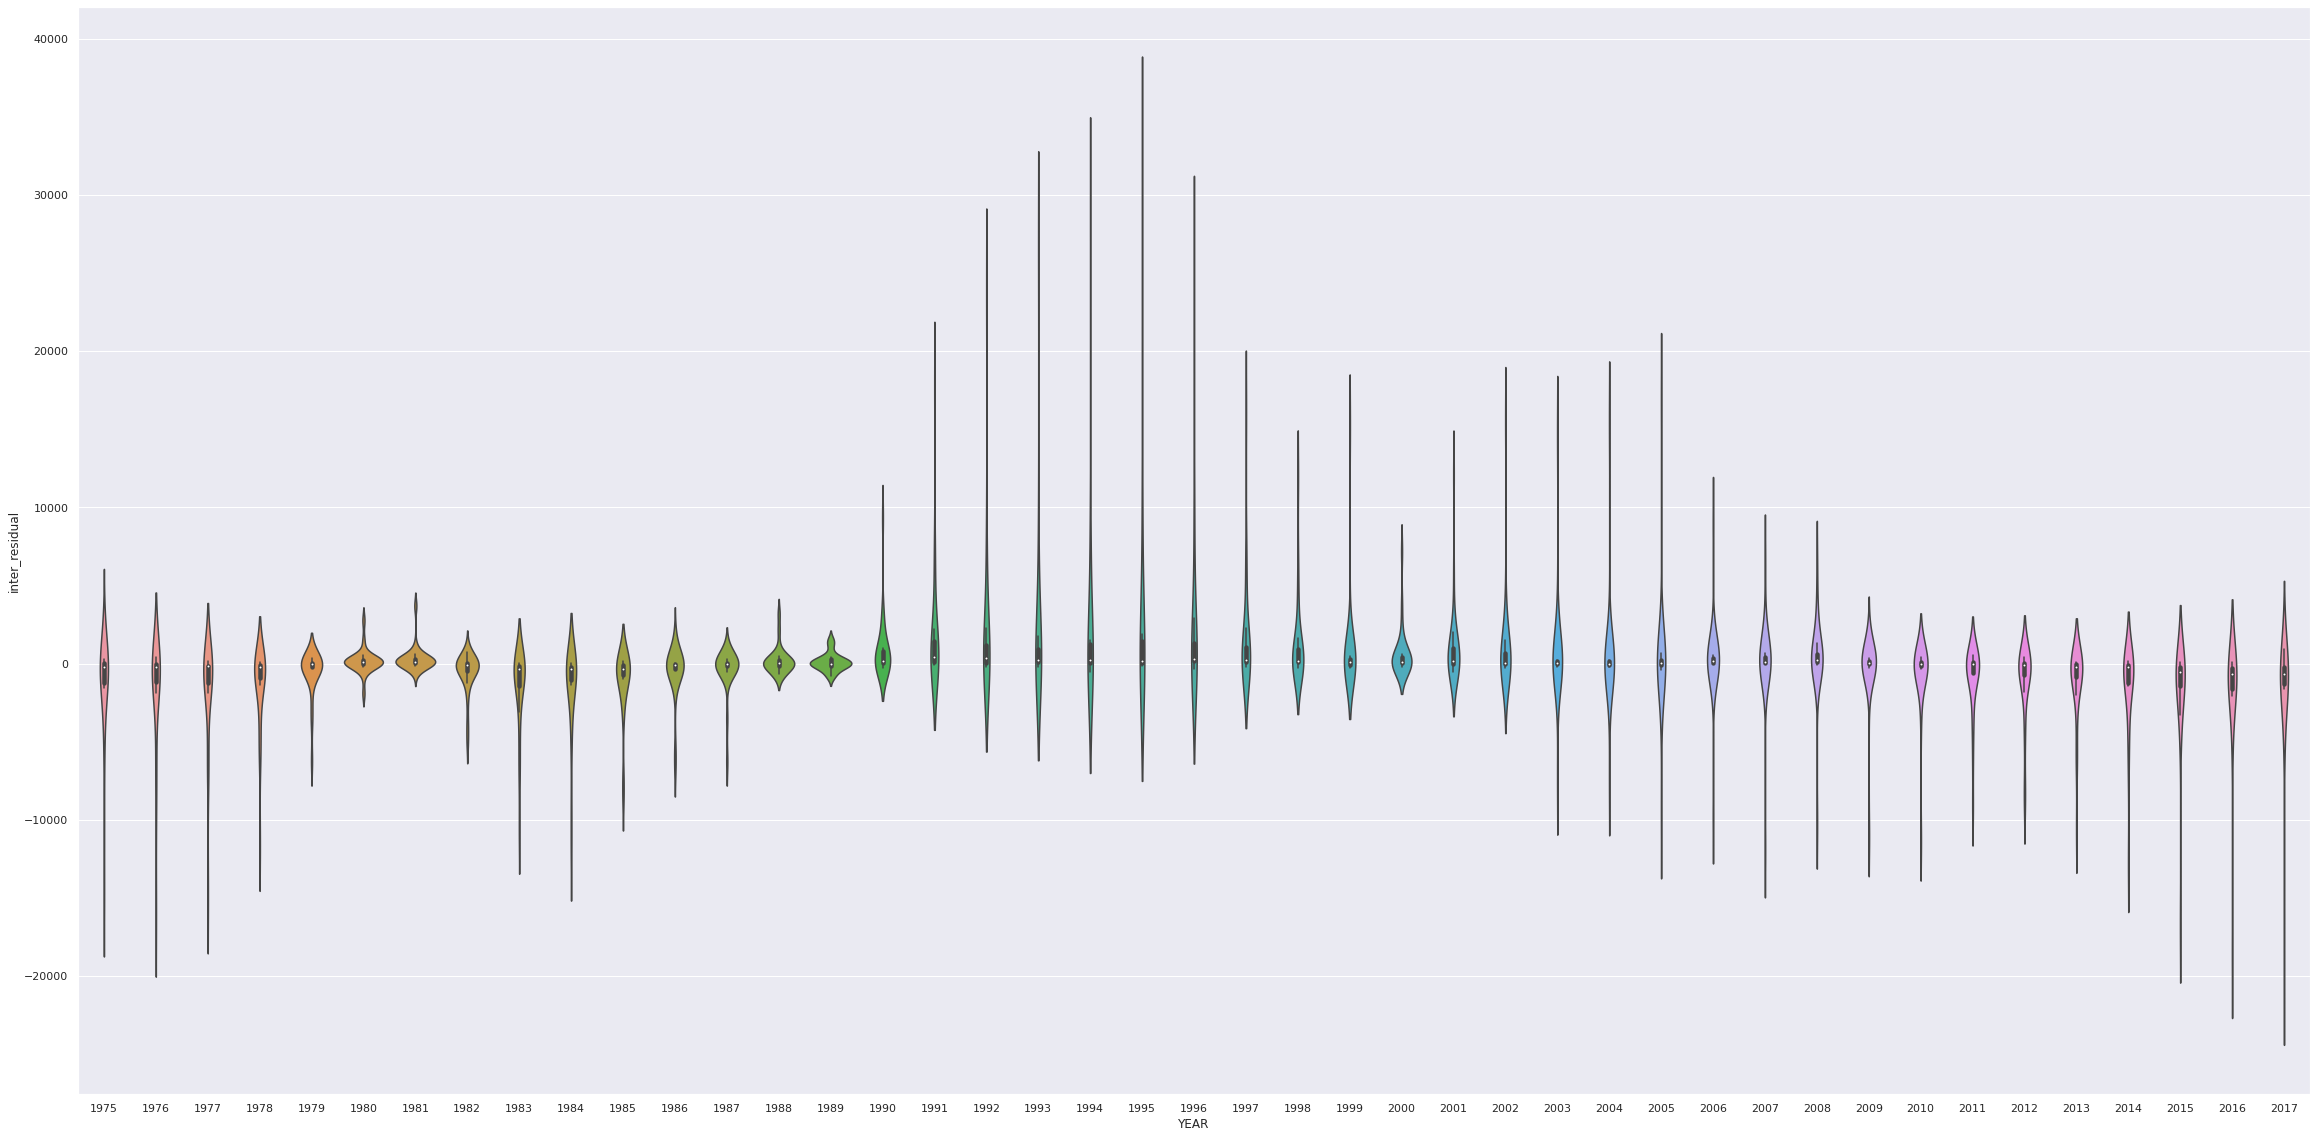

In [11]:
data['inter_residual'] = data['GRAND_TOTAL'] - data['interaction_prediction'] 
sns.set(rc={'figure.figsize':(40,20)})
ax = sns.violinplot(x="YEAR", y="inter_residual", data = data)

From the violin plot shown above, we can conclude the effect of year on total crime could be influenced remarkably by the counties, which matches our intuition.

Most of the mean residuals lie on the 0 axis, which is good. However, there are certain outliers shown in the graph especially between 1991 and 1996 and after 2010. After 2010, our model seems to predict bigger numbers of total crime compred to the real numbers.

Let's take a detailed look on the total crime of PG county, which is our county, after 2010. 

In [12]:
pg = data.loc[(data['YEAR'] >= 2010) & (data['JURISDICTION'] == 'Prince George\'s County')]
pg[['YEAR','GRAND_TOTAL','interaction_prediction']]

,YEAR,GRAND_TOTAL,interaction_prediction
723,2010,43073,44460.852001
724,2011,38110,44193.301563
725,2012,36072,43925.751125
726,2013,33058,43658.200687
727,2014,30671,43390.650249
728,2015,26386,43123.099811
729,2016,24230,42855.549373
730,2017,22558,42587.998935


It seems that the prediction goes pretty well at the beginning, but the real number drops abruptly as the time goes by.

Therefore, we decide to fit a model of higher degrees to cover this change using the PolynomialFeatures module from sklearn.


## Polynomial model

The polynomial model would have a degree of two with the function:

###### Predicted_Total_Crime = constant + a1 * year + a2 * year * county1 + a3 * year * county2 +...+ aN * year * countyN + b1 * year ^2 +  b2 * year^2 * county1^2 + b3 * year^2 * county2^2 +...+ bN * year^2 * countyN^2

We just manually set up the function by adding squared term because using the polymodel from sklearn or statsmodele would include interaction terms between counties, which would be useless.


In [13]:
X_inter = X_inter.drop(columns = 'const')

In [14]:
xp = np.hstack((X_inter, X_inter**2))
xp = sm.add_constant(xp)
poly_model = sm.OLS(Y, xp).fit()
poly_pred = poly_model.predict(xp) 
data['poly_prediction'] = poly_pred
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            GRAND_TOTAL   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     595.5
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:02:34   Log-Likelihood:                -9563.5
No. Observations:                1032   AIC:                         1.927e+04
Df Residuals:                     960   BIC:                         1.963e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.075e+07   2.21e+06    -13.924      0.000   -3.51e+07   -2.64e+07
x1          3.213e+04   2301.128     13.962      0.000    2.76e+04    3.66e+04
x2          1.519e+07   5.74e+06      2.647      0.008    3.93e+06    2.64e+07
x3         -6.788e+06   5.74e+06     -1.183      0.237    -1.8e+07    4.47e+06
x4         -9.863e+07   5.74e+06    -17.192      0.000    -1.1e+08   -8.74e+07
x5         -3.172e+07   5.74e+06     -5.530      0.000    -4.3e+07   -2.05e+07
x6          1.343e+07   5.74e+06      2.341      0.019    2.17e+06    2.47e+07
x7          1.433e+07   5.74e+06      2.497      0.013    3.07e+06    2.56e+07
x8          9.378e+06   5.74e+06      1.635      0.102   -1.88e+06    2.06e+07
x9          1.486e+07   5.74e+06      2.590      0.010     3.6e+06    2.61e+07
x10         4.729e+06   5.74e+06      0.824      0.410   -6.53e+06     1.6e+07
x11         1.512e+07   5.74e+06      2.636      0.009    3.87e+06    2.64e+07
x12         9.032e+06   5.74e+06      1.574      0.116   -2.23e+06    2.03e+07
x13         1.496e+07   5.74e+06      2.607      0.009     3.7e+06    2.62e+07
x14         9.093e+06   5.74e+06      1.585      0.113   -2.17e+06    2.04e+07
x15         1.142e+06   5.74e+06      0.199      0.842   -1.01e+07    1.24e+07
x16         1.522e+07   5.74e+06      2.653      0.008    3.96e+06    2.65e+07
x17        -3.351e+07   5.74e+06     -5.840      0.000   -4.48e+07   -2.22e+07
x18        -8.867e+07   5.74e+06    -15.457      0.000   -9.99e+07   -7.74e+07
x19         1.398e+07   5.74e+06      2.436      0.015    2.72e+06    2.52e+07
x20         1.406e+07   5.74e+06      2.451      0.014     2.8e+06    2.53e+07
x21          1.39e+07   5.74e+06      2.422      0.016    2.64e+06    2.52e+07
x22           1.4e+07   5.74e+06      2.441      0.015    2.74e+06    2.53e+07
x23         1.614e+07   5.74e+06      2.813      0.005    4.88e+06    2.74e+07
x24         7.162e+06   5.74e+06      1.248      0.212    -4.1e+06    1.84e+07
x25         1.286e+07   5.74e+06      2.242      0.025    1.61e+06    2.41e+07
x26        -3.177e+04   1.15e+04     -2.763      0.006   -5.43e+04   -9207.736
x27         1.234e+04   1.15e+04      1.074      0.283   -1.02e+04    3.49e+04
x28         1.974e+05   1.15e+04     17.174      0.000    1.75e+05     2.2e+05
x29         6.269e+04   1.15e+04      5.453      0.000    4.01e+04    8.52e+04
x30        -2.826e+04   1.15e+04     -2.458      0.014   -5.08e+04   -5697.695
x31        -3.004e+04   1.15e+04     -2.614      0.009   -5.26e+04   -7486.297
x32        -2.012e+04   1.15e+04     -1.750      0.080   -4.27e+04    2437.578
x33        -3.113e+04   1.15e+04     -2.708      0.007   -5.37e+04   -8569.682
x34        -1.083e+04   1.15e+04     -0.942      0.346   -3.34e+04    1.17e+04
x35        -3.163e+04   1.15e+04     -2.751      0.006   -5.42e+04   -9066.902
x3

We can observe a higher R^2 value of 0.978, meaning that the polynomial model is doing a better job now at prediction.

Let's take a look at the prediction of the PG county by the polynomial model again.

In [15]:
pg = data.loc[(data['YEAR'] >= 2010) & (data['JURISDICTION'] == 'Prince George\'s County')]
pg[['YEAR','GRAND_TOTAL','poly_prediction']]

,YEAR,GRAND_TOTAL,poly_prediction
723,2010,43073,42260.835464
724,2011,38110,40474.232094
725,2012,36072,38582.866809
726,2013,33058,36586.739609
727,2014,30671,34485.850495
728,2015,26386,32280.199466
729,2016,24230,29969.786523
730,2017,22558,27554.611665


This time, the prediction of the total crime number drops much more quickly than the number predicted by the linear model and shows a better prediction.

Let's have a try to predict the Grand_total of Prince George's County in 2021. 

In [16]:
X_2021 = [0] * len(X_inter.columns)
for index, i in enumerate(X_inter.columns): 
    if(i == 'YEAR'):
        X_2021[index] = 2021
    if(i == 'JURISDICTION_Prince George\'s County'):
        X_2021[index] = 1
    if(i == 'YEAR*JURISDICTION_Prince George\'s County'):
        X_2021[index] = 2021
X_2021 = np.hstack((X_2021, np.array(X_2021)**2))
X_2021 = np.insert(X_2021, 0, 1)
poly_model.predict(X_2021)

array([16846.29308724])

Our model predicts the 2021 crime number of 16846, which looks pretty decent based on the data observed before.

We want to predict the 2021 crime number of all the Maryland counties using our model.

We choose to use a seaborn bar plot because it is easy to observe the number of total crimes for each county and also straightforward to compare the levels of safety among the conties. For more information creating the bar plot: https://seaborn.pydata.org/generated/seaborn.barplot.html


In [89]:
columns = np.array(X_inter.columns)
columns = np.delete(columns,0)
columns = columns.reshape(2,-1)
predictions_2021 = {'county':[],'total_crime':[]}
for j in range(len(columns[0])):
    X_2021 = [0] * len(X_inter.columns)
    for index, i in enumerate(X_inter.columns): 
        if(i == 'YEAR'):
            X_2021[index] = 2021
        if(i == columns[0][j]):
            X_2021[index] = 1
        if(i == columns[1][j]):
            X_2021[index] = 2021
    X_2021 = np.hstack((X_2021, np.array(X_2021)**2))
    X_2021 = np.insert(X_2021, 0, 1)
    pred = poly_model.predict(X_2021)
    predictions_2021['county'].append(columns[0][j].split("_",1)[1])
    predictions_2021['total_crime'].append(pred[0])
df_2021 = pd.DataFrame(predictions_2021)

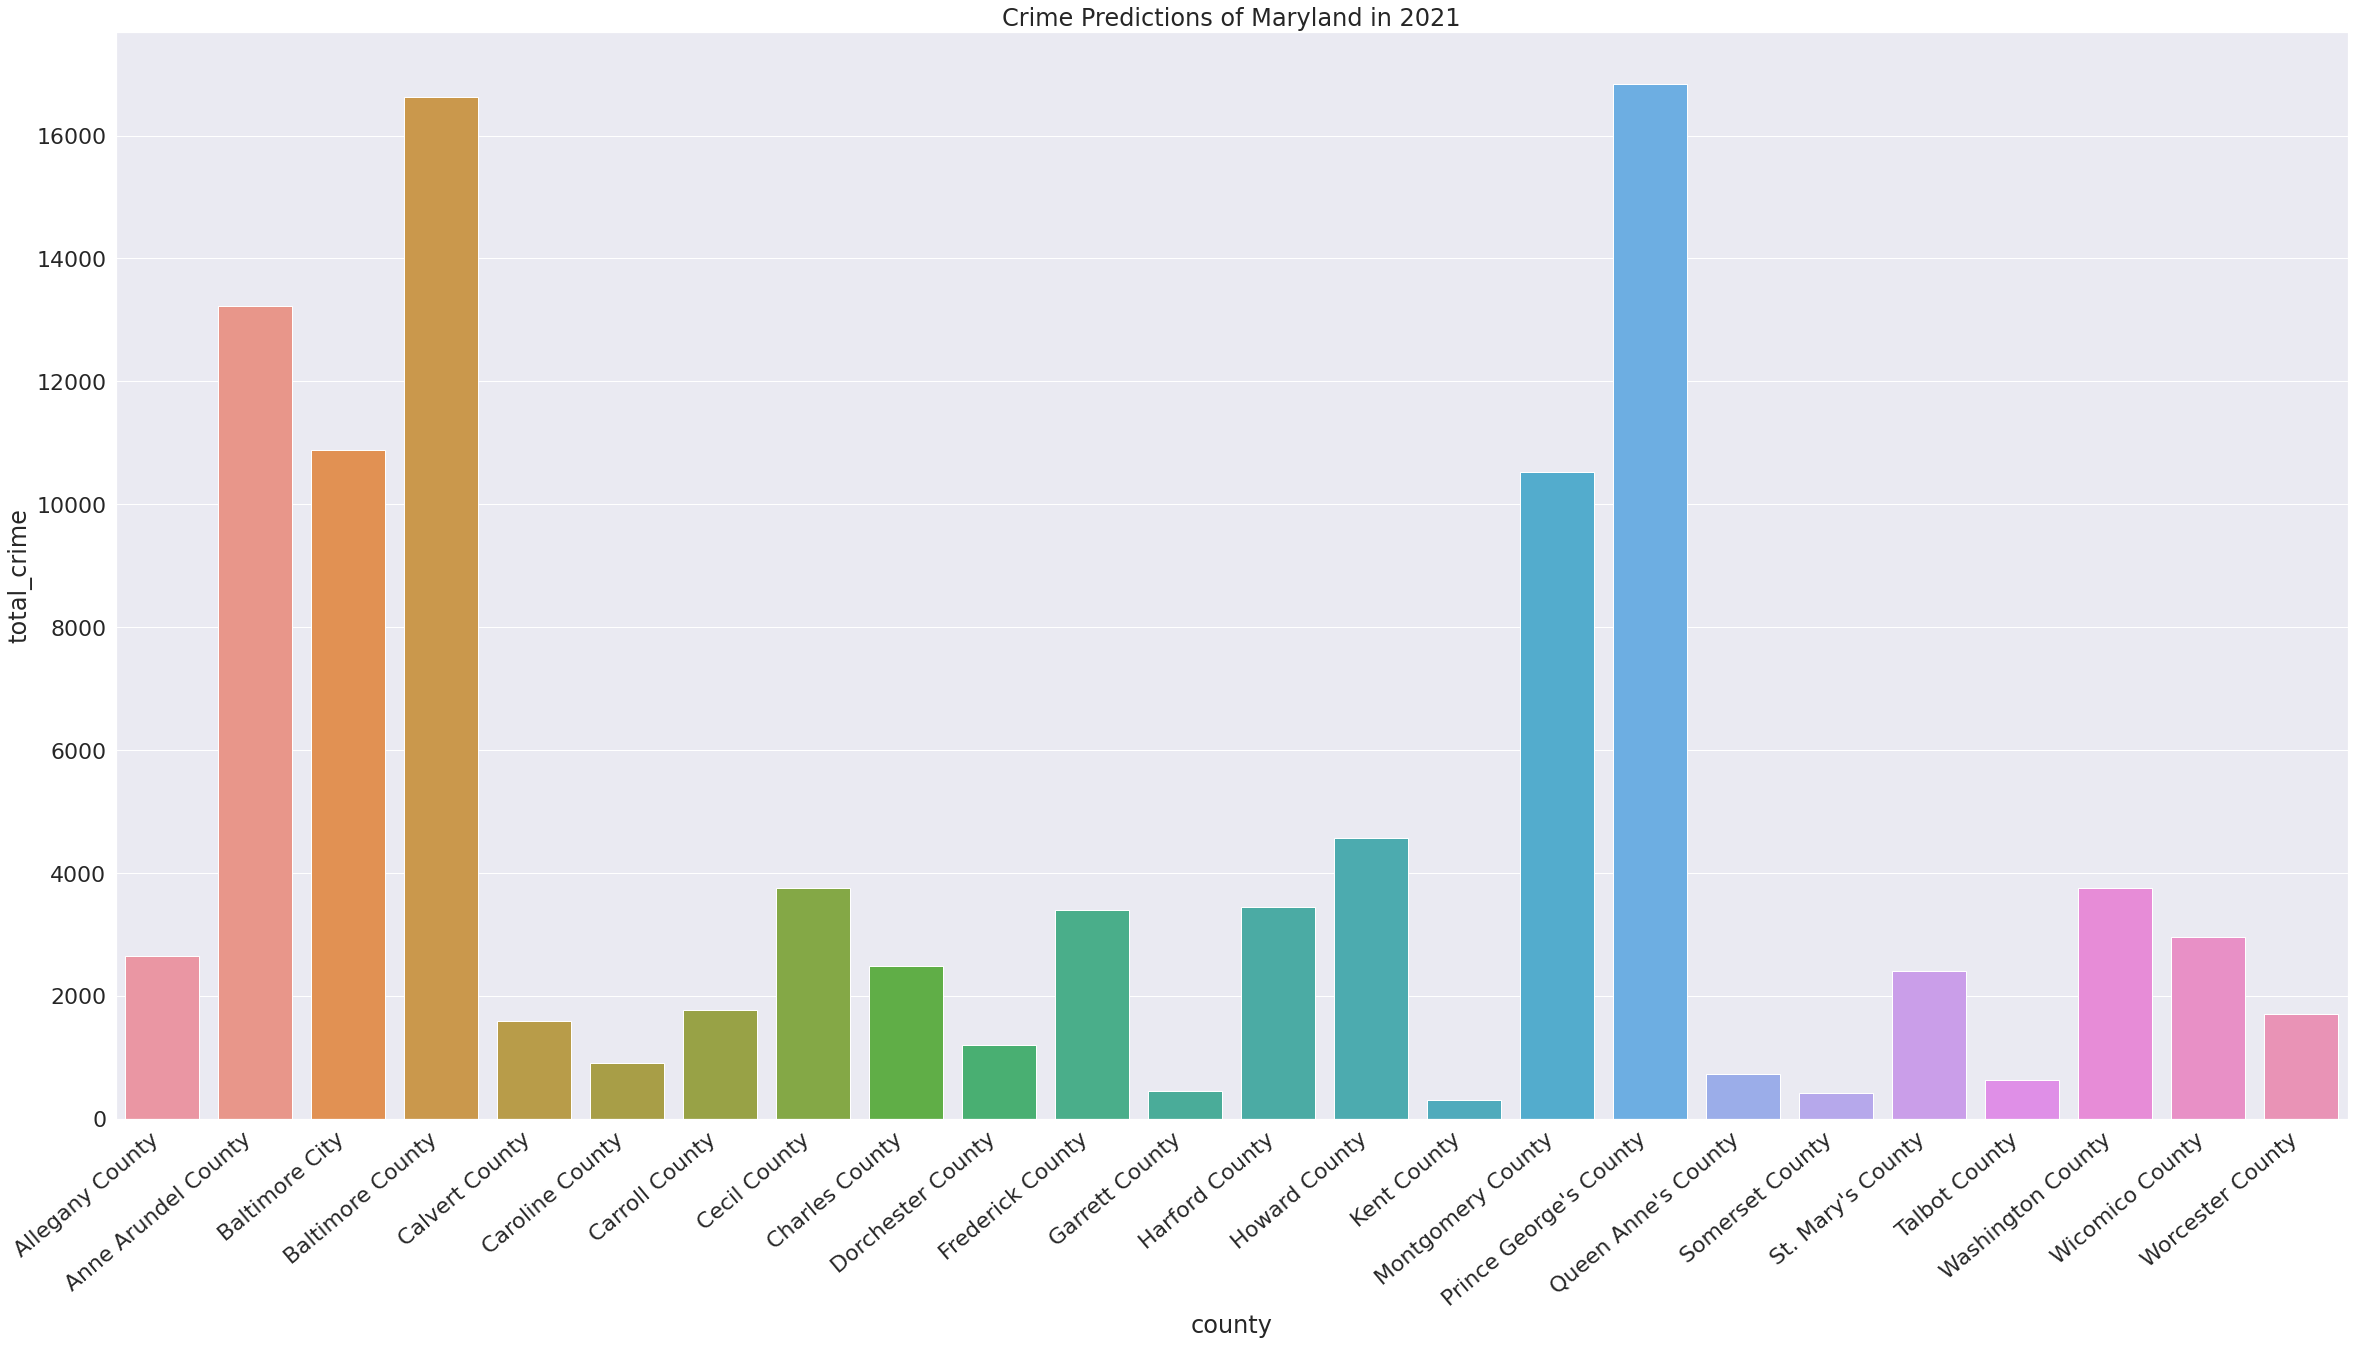

In [96]:
sns.set(font_scale=2) 
ax = sns.barplot(x = 'county', y = "total_crime", data = df_2021)
ax.set_title('Crime Predictions of Maryland in 2021')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

The total crime of each county is quite obvious. We could observe that our county has almost the highest number of crime committed in Maryland. The differences among the counties are huge.